In [1]:
%pwd

'c:\\Users\\Fahmi Maulana\\Documents\\Projects\\weather-anomaly-detection\\exploratory-data-analysis\\notebooks'

In [2]:
%cd ../..

c:\Users\Fahmi Maulana\Documents\Projects\weather-anomaly-detection


c:\Users\Fahmi Maulana\.pyenv-win-venv\envs\weather-anomaly-detection\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.seasonal import seasonal_decompose

# Initial Data Inspection
## Loading Data

In [4]:
# Dictionary mapping weather codes to descriptions
weather_code_mapping = {
    0: "Clear Sky",
    1: "Mainly Clear",
    2: "Partly Cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing Rime Fog",
    51: "Drizzle: Light",
    53: "Drizzle: Moderate",
    55: "Drizzle: Dense",
    56: "Freezing Drizzle: Light",
    57: "Freezing Drizzle: Dense",
    61: "Rain: Slight",
    63: "Rain: Moderate",
    65: "Rain: Heavy",
    66: "Freezing Rain: Light",
    67: "Freezing Rain: Heavy",
    71: "Snow Fall: Slight",
    73: "Snow Fall: Moderate",
    75: "Snow Fall: Heavy",
    77: "Snow Grains",
    80: "Rain Showers: Slight",
    81: "Rain Showers: Moderate",
    82: "Rain Showers: Violent",
    85: "Snow Showers: Slight",
    86: "Snow Showers: Heavy",
    95: "Thunderstorm: Slight or Moderate",
    96: "Thunderstorm with Hail",
    99: "Thunderstorm with Hail"
}

In [5]:
pd.set_option("display.max_columns", None)
raw_df = pd.read_csv("./data/01_raw/jakarta_daily_weather_data_2010-2023.csv", 
                     date_parser=lambda x: pd.to_datetime(x).tz_convert('Asia/Bangkok'),
                     parse_dates=["date"],
                    )
raw_df["weather_description"] = raw_df["weather_code"].map(weather_code_mapping)
raw_df.rename(columns={"date":"datetime"}, inplace=True)
raw_df["date"] = raw_df["datetime"].dt.date
raw_df


C:\Users\Fahmi Maulana\AppData\Local\Temp\ipykernel_4840\151838006.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  raw_df = pd.read_csv("./data/01_raw/jakarta_daily_weather_data_2010-2023.csv",


,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,weather_description,date
0,2010-01-01 00:00:00+07:00,55.0,29.346000,24.346000,26.493912,33.960170,28.426277,30.544830,0,0,44896.137,25858.787,4.000000,4.000000,0.0,14.0,15.978486,38.160000,245.528370,16.24,3.553079,Drizzle: Dense,2010-01-01
1,2010-01-02 00:00:00+07:00,63.0,30.696000,23.896000,26.858500,37.097730,28.470013,31.728783,0,0,44890.758,32148.900,6.500000,6.500000,0.0,4.0,14.707222,31.319998,237.893750,19.80,4.135429,Rain: Moderate,2010-01-02
2,2010-01-03 00:00:00+07:00,63.0,30.346000,24.246000,26.652250,36.627003,28.546375,31.245909,0,0,44884.926,38630.723,7.600000,7.600000,0.0,11.0,12.646200,26.640000,243.816120,17.32,3.662728,Rain: Moderate,2010-01-03
3,2010-01-04 00:00:00+07:00,51.0,30.196000,25.296000,27.308502,35.273200,29.467575,31.453005,0,0,44878.650,41568.150,0.900000,0.900000,0.0,5.0,19.319628,34.200000,239.246580,20.43,4.381917,Drizzle: Light,2010-01-04
4,2010-01-05 00:00:00+07:00,63.0,29.796000,24.746000,26.373077,35.096622,28.481304,30.532106,0,0,44871.930,24485.676,14.300001,14.300001,0.0,7.0,15.893093,32.039997,246.906390,15.86,3.420594,Rain: Moderate,2010-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,2023-12-27 00:00:00+07:00,61.0,30.765501,24.715500,27.171751,37.685635,29.997322,32.890606,0,0,44917.934,39061.520,5.800000,5.800000,0.0,12.0,13.450708,33.839996,341.221830,20.29,4.149257,Rain: Slight,2023-12-27
5109,2023-12-28 00:00:00+07:00,63.0,32.015500,24.315500,27.400917,38.291550,29.685040,33.214333,0,0,44915.016,42071.566,9.500000,9.500000,0.0,9.0,14.830076,34.920000,342.135070,23.21,4.722630,Rain: Moderate,2023-12-28
5110,2023-12-29 00:00:00+07:00,63.0,30.915500,24.965500,27.521751,38.060226,30.560104,33.526210,0,0,44911.582,35891.555,8.100000,8.100000,0.0,11.0,14.494192,36.000000,48.758728,19.28,3.979145,Rain: Moderate,2023-12-29
5111,2023-12-30 00:00:00+07:00,63.0,30.815500,24.065500,26.984251,38.101635,28.255577,32.431828,0,0,44907.640,39464.184,18.500000,18.500000,0.0,20.0,14.578890,32.399998,56.309900,20.25,4.109184,Rain: Moderate,2023-12-30


## Check Data Types

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype                       
---  ------                       --------------  -----                       
 0   datetime                     5113 non-null   datetime64[ns, Asia/Bangkok]
 1   weather_code                 5113 non-null   float64                     
 2   temperature_2m_max           5113 non-null   float64                     
 3   temperature_2m_min           5113 non-null   float64                     
 4   temperature_2m_mean          5113 non-null   float64                     
 5   apparent_temperature_max     5113 non-null   float64                     
 6   apparent_temperature_min     5113 non-null   float64                     
 7   apparent_temperature_mean    5113 non-null   float64                     
 8   sunrise                      5113 non-null   int64                       
 9   sunset             

## Check Missing Values

In [7]:
raw_df.isnull().sum()

datetime                       0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            0
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      0
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              0
precipitation_sum              0
rain_sum                       0
snowfall_sum                   0
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
weather_description            0
date                           0
dtype: int64

In [8]:
# Create a complete date range from 2010-01-01 to 2023-12-31
date_range = pd.date_range(start='2010-01-01', end='2023-12-31')

# Identify missing dates by comparing the date range with the dates in the dataset
missing_dates = date_range.difference(raw_df['date'])
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

## Descriptive Statistics

In [9]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
weather_code,5113.0,51.008410,18.619263,0.000000,51.000000,55.000000,63.000000,65.000000
temperature_2m_max,5113.0,29.956413,1.339548,24.396000,29.146000,29.996000,30.815500,35.065502
temperature_2m_min,5113.0,23.905324,0.706421,20.015501,23.465500,23.946000,24.365501,26.315500
temperature_2m_mean,5113.0,26.604937,0.802054,23.723082,26.075165,26.619667,27.155083,29.384254
apparent_temperature_max,5113.0,35.334246,1.769515,27.736720,34.262070,35.548650,36.595505,39.983460
apparent_temperature_min,5113.0,28.384033,1.175544,22.546871,27.639830,28.398770,29.218853,31.695213
apparent_temperature_mean,5113.0,31.361861,1.116031,26.712770,30.663467,31.465990,32.154026,34.196148
sunrise,5113.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sunset,5113.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
daylight_duration,5113.0,43599.501803,888.710826,42353.523000,42730.420000,43564.445000,44464.715000,44924.490000


# Initial Visualizations
## Time Series Plot

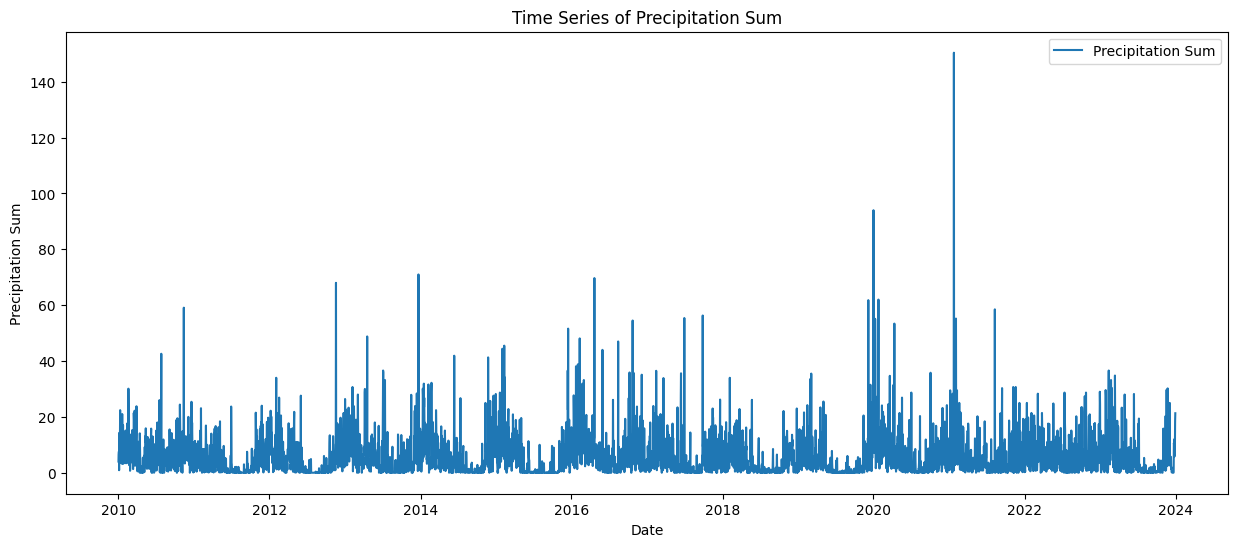

In [10]:
# Time series plot of precipitation_sum
plt.figure(figsize=(15, 6))
plt.plot(raw_df['date'], raw_df['precipitation_sum'], label='Precipitation Sum')
plt.xlabel('Date')
plt.ylabel('Precipitation Sum')
plt.title('Time Series of Precipitation Sum')
plt.legend()
plt.show()

In [11]:
fig = px.line(raw_df, x='date', y='precipitation_sum', title='Precipitation Sum Time Series')
fig.update_xaxes(rangeslider_visible=True)

# Set the height and width of the chart
fig.update_layout(height=600, width=1000)

# Center-align the title
fig.update_layout(title_x=0.5)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Distribution Plot

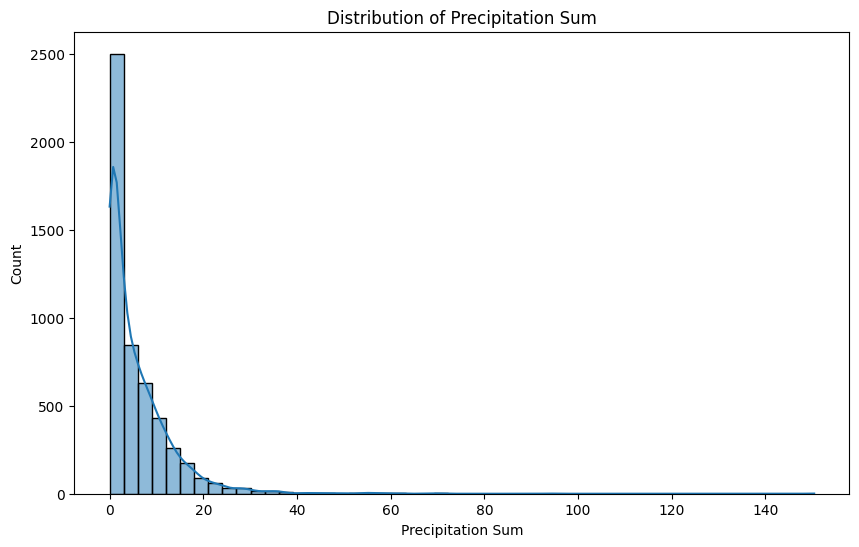

In [ ]:
# Distribution plot of precipitation_sum
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['precipitation_sum'], bins=50, kde=True)
plt.xlabel('Precipitation Sum')
plt.title('Distribution of Precipitation Sum')
plt.show()


## Box Plot

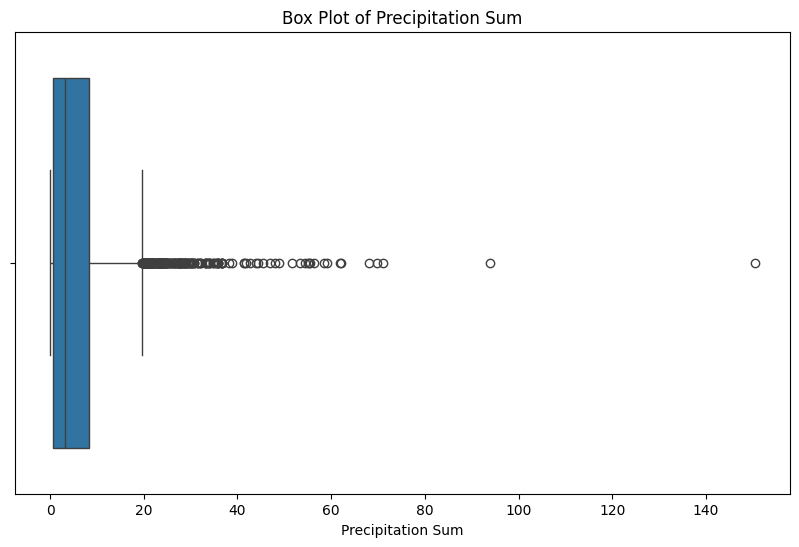

In [ ]:
# Box plot to identify outliers in precipitation_sum
plt.figure(figsize=(10, 6))
sns.boxplot(x=raw_df['precipitation_sum'])
plt.xlabel('Precipitation Sum')
plt.title('Box Plot of Precipitation Sum')
plt.show()

# Trend and Seasonality Analysis
## Decompose Time Series

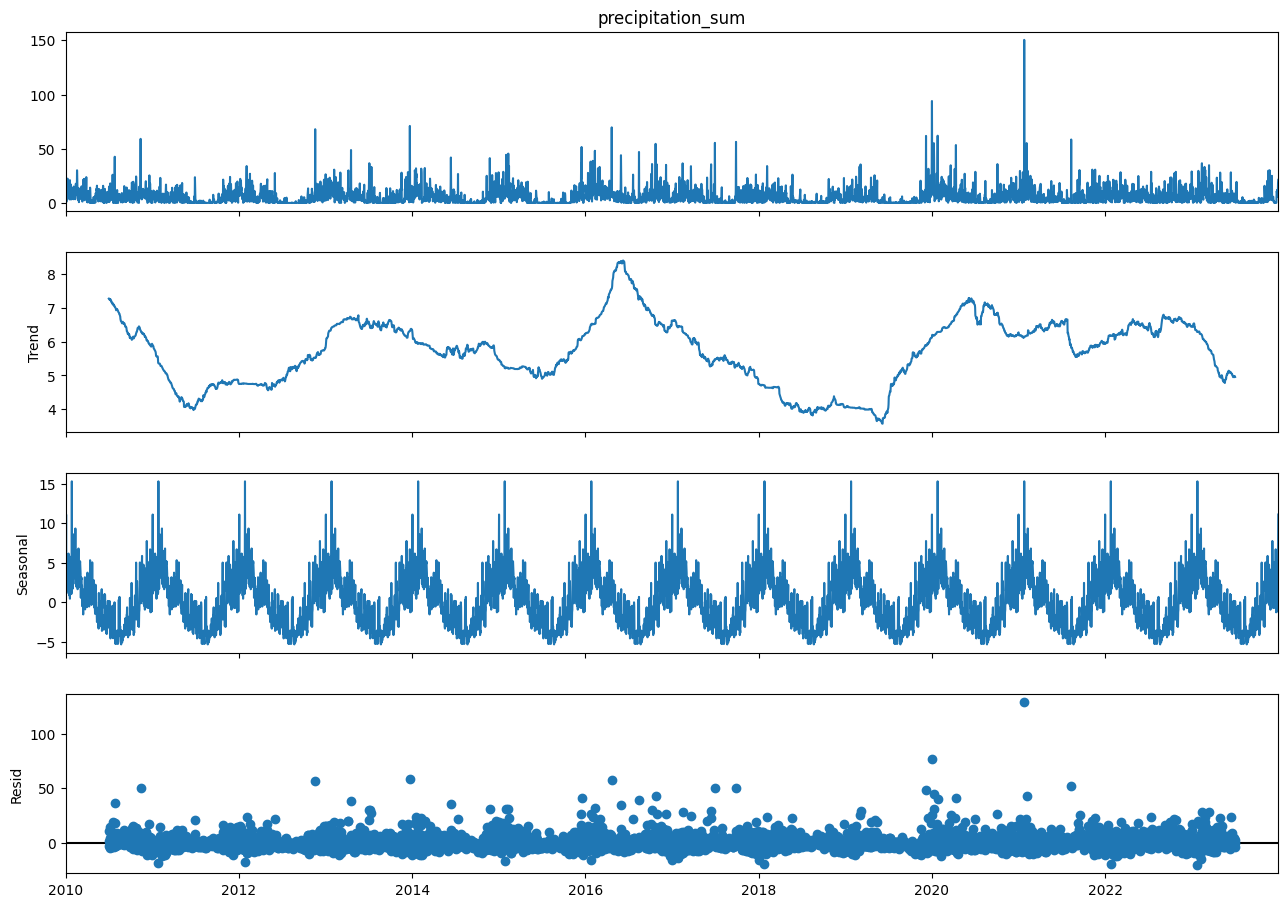

In [ ]:
# Seasonal decomposition of time series data
decomposition = seasonal_decompose(raw_df.set_index('date')['precipitation_sum'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

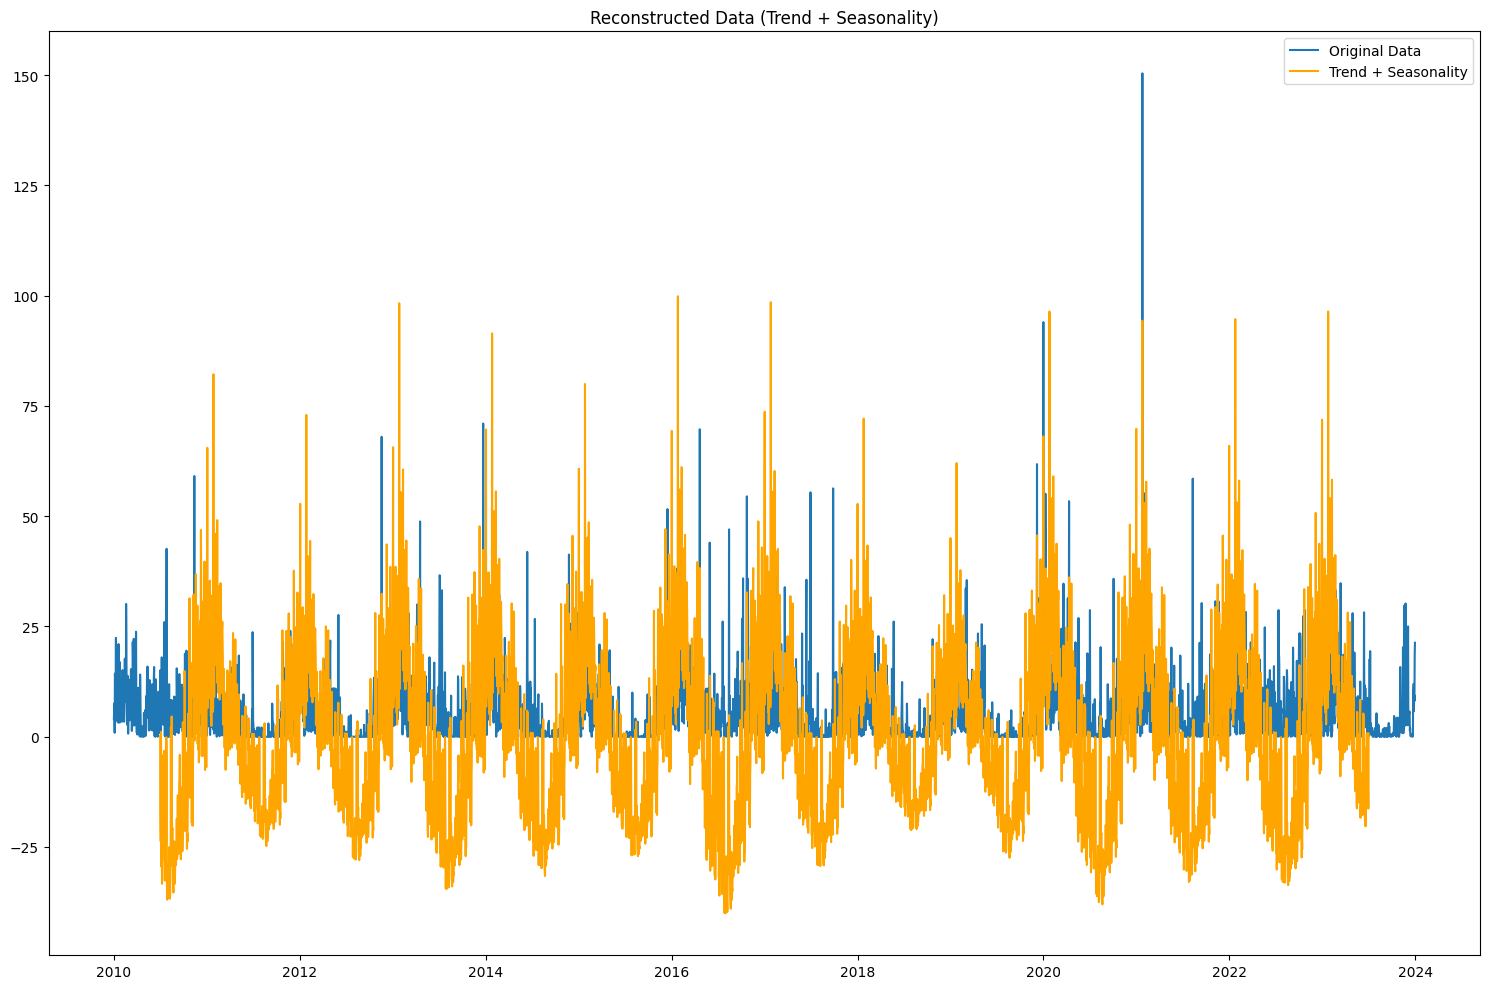

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

reconstructed = trend * seasonal

# Plot perbandingan antara data asli dengan hasil dekomposisi
plt.figure(figsize=(15, 10))

plt.plot(raw_df.set_index('date')['precipitation_sum'], label='Original Data')
plt.plot(reconstructed, label='Trend + Seasonality', color='orange')
plt.title('Original Data')
plt.title('Reconstructed Data (Trend + Seasonality)')
plt.legend()

plt.tight_layout()
plt.show()

## Mann-Kendall

## Monthly Data

In [ ]:
# Resample the data to monthly sums to see trends
raw_df_monthly = raw_df.drop(["date"], axis=1).set_index("datetime").resample('M').sum()
raw_df_monthly["month"] = raw_df_monthly.index.strftime('%B')
raw_df_monthly["year"] = raw_df_monthly.index.year

C:\Users\Fahmi Maulana\AppData\Local\Temp\ipykernel_40048\1843441043.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  raw_df_monthly = raw_df.drop(["date"], axis=1).set_index("datetime").resample('M').sum()


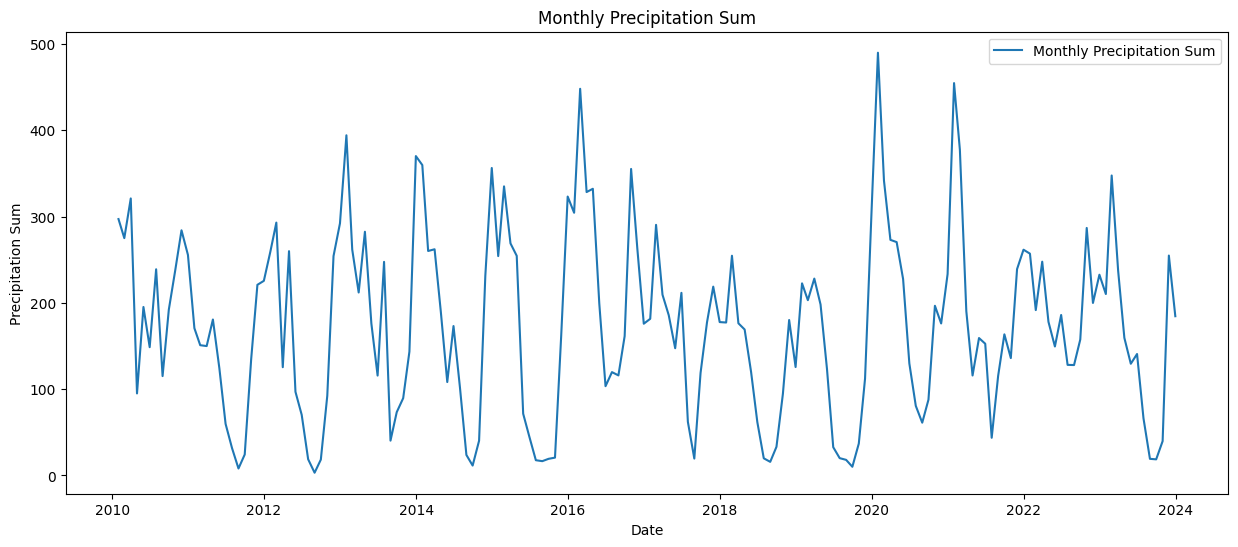

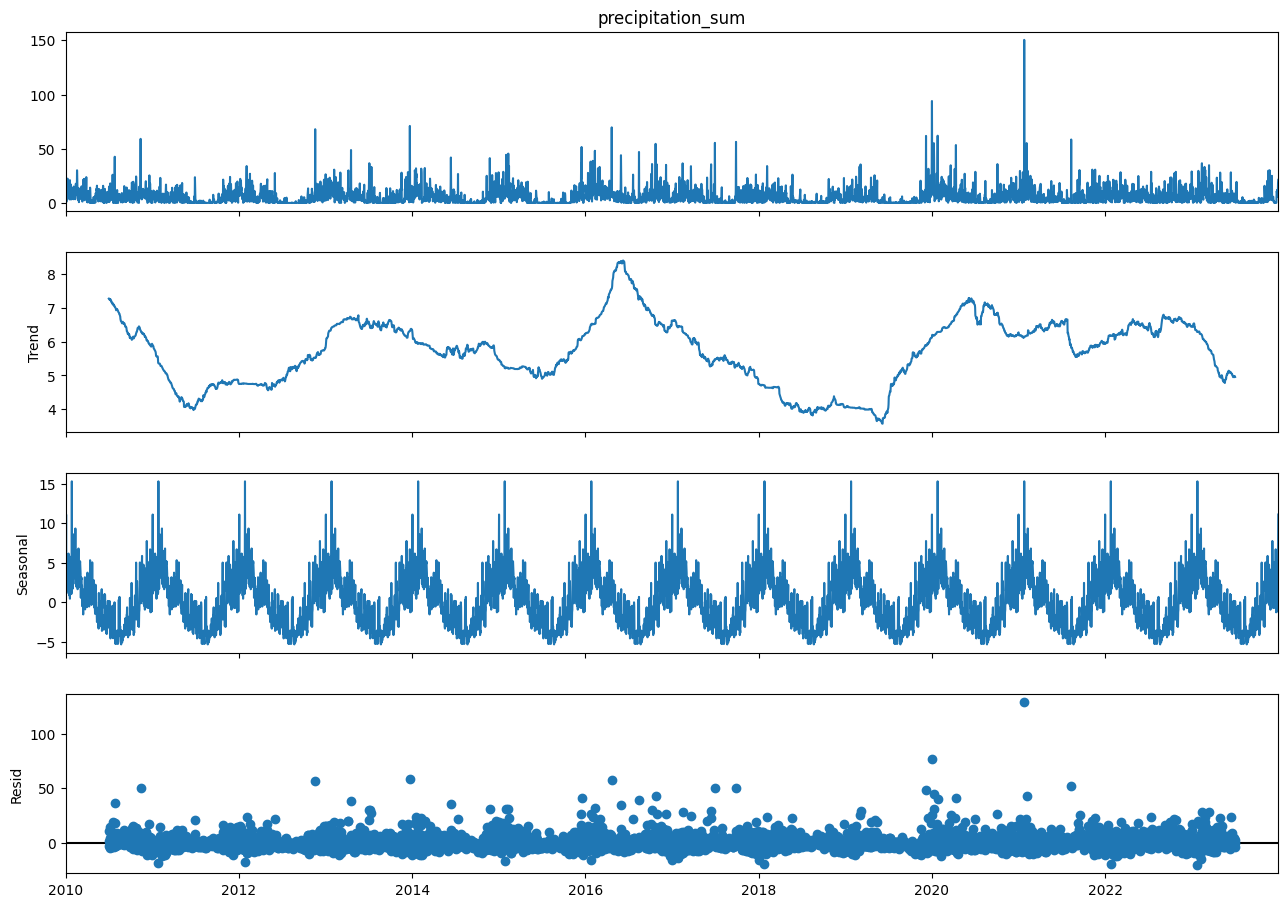

In [ ]:
# Time series plot of monthly precipitation_sum
plt.figure(figsize=(15, 6))
plt.plot(raw_df_monthly.index, raw_df_monthly['precipitation_sum'], label='Monthly Precipitation Sum')
plt.xlabel('Date')
plt.ylabel('Precipitation Sum')
plt.title('Monthly Precipitation Sum')
plt.legend()
plt.show()

# Seasonal decomposition of time series data
decomposition = seasonal_decompose(raw_df.set_index('date')['precipitation_sum'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

In [ ]:
# Pivot the data to have months as rows, years as columns, and the sum of precipitation as values
raw_df_monthly_pivot = raw_df_monthly.pivot_table(index='month', columns='year', values='precipitation_sum', aggfunc='sum')

# Reorder the months to ensure they appear in calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
raw_df_monthly_pivot = raw_df_monthly_pivot.reindex(months_order)
raw_df_monthly_pivot


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,
January,297.200002,170.700004,259.099996,394.299993,359.800001,254.299996,304.500003,181.600002,177.300004,222.700005,490.000000,454.800010,257.100004,210.300000
February,275.099997,150.999994,293.100010,261.800007,260.200005,335.099992,448.199999,290.500000,254.700009,203.200002,341.800004,377.600000,191.700000,347.700006
March,321.100000,150.000002,125.500000,212.100003,262.200005,269.000001,328.500003,209.499997,176.399999,228.200000,273.100007,190.400001,247.800006,237.499991
April,95.100001,180.800000,260.000008,282.500007,189.800000,254.599998,332.299987,185.800002,169.199998,198.200005,270.499994,115.900001,178.100003,159.499997
May,195.300006,124.399999,97.000000,176.199996,108.300000,71.600001,199.400001,147.500005,119.999997,123.400001,227.700004,159.299998,149.500001,129.500003
June,148.699997,59.800001,70.300000,115.799998,173.199996,44.699998,103.500002,211.699994,61.900002,32.799999,129.899999,152.700001,186.000002,140.800001
July,238.999999,31.700000,18.800000,247.599998,102.000001,17.700000,119.799998,62.200000,19.900001,20.100000,80.700002,43.700001,128.200005,66.200000
August,115.199997,8.100000,3.200000,40.399999,23.800000,16.600000,115.999998,19.600000,15.800000,18.100001,61.199998,115.400000,127.999996,19.300000
September,192.199997,24.300000,18.400000,73.400002,11.500000,19.299999,161.500001,118.799995,33.200000,10.100000,87.900000,163.600002,157.599997,18.700000


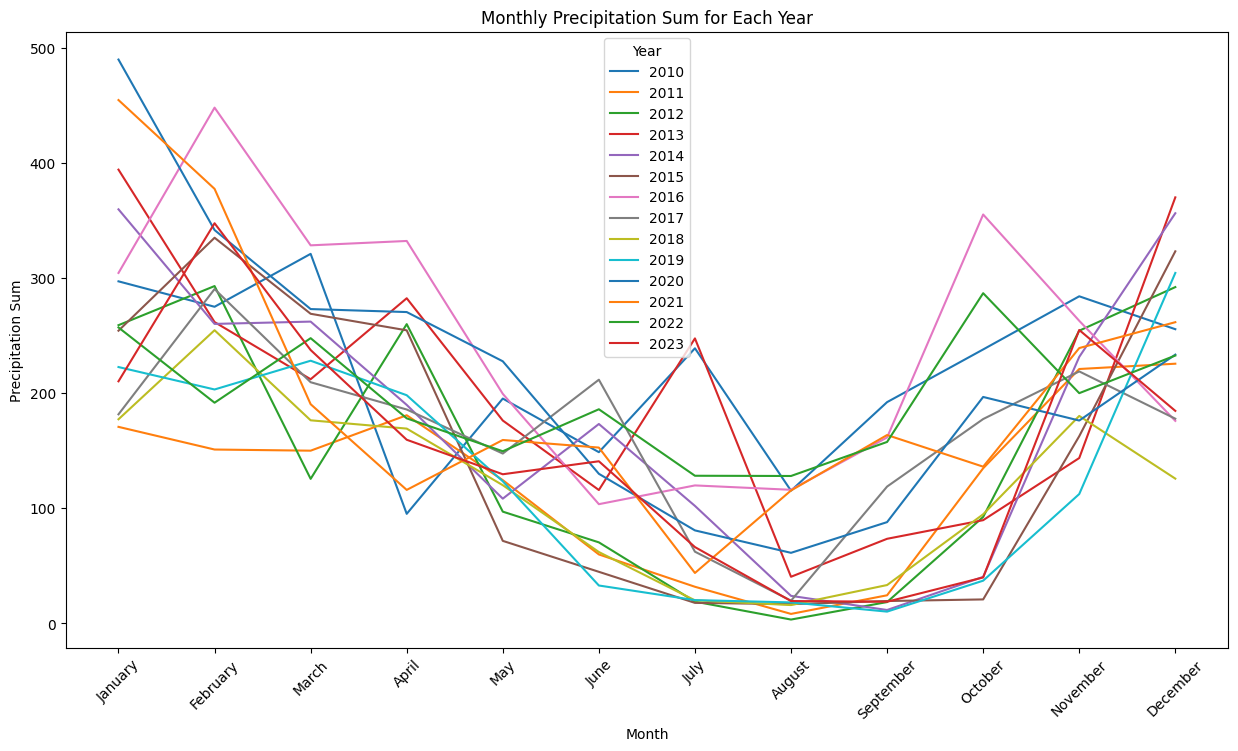

In [ ]:
# Plotting the time series data
plt.figure(figsize=(15, 8))
for year in raw_df_monthly_pivot.columns:
    plt.plot(raw_df_monthly_pivot.index, raw_df_monthly_pivot[year], label=year)

plt.xlabel('Month')
plt.ylabel('Precipitation Sum')
plt.title('Monthly Precipitation Sum for Each Year')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

# Stationary Test

# Autocorrelation and PACF plots